In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
os.chdir("Z:\\ML Course\\Clustering\\Data\\Images")
%matplotlib inline

In [2]:
def get_image(path):
    im=cv2.imread(path)
    im=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    im=cv2.resize(im,(90,135),cv2.INTER_LINEAR)
    i=im[0:100,:]
    return i

In [3]:
labels=[]
images=[]

In [4]:
for i in ['1','2','3','4']:
    for p in enumerate(os.listdir(os.getcwd()+"\\"+i)):
        images.append(get_image(os.getcwd()+'\\'+i+'\\'+p[1]))
        labels.append(i)

In [5]:
x_train=np.array(images)      
x_train.shape

(380, 100, 90)

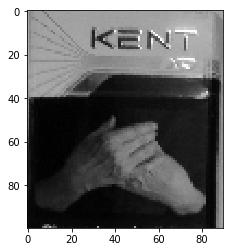

In [6]:
plt.imshow(x_train[100,:],cmap="gray")

In [7]:
pixels = x_train.flatten().reshape(380, 9000) # 31500 = 350*300*3 
print(pixels.shape)

(380, 9000)


In [8]:
## Model Building
import pandas as pd
from sklearn.cluster import KMeans

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
Scaler = MinMaxScaler()
train = Scaler.fit_transform(pixels)

C:\Users\MEDIA ENGINEER\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
np.random.seed(100)
kmeans.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3,

In [13]:
image_clusters=pd.DataFrame({'Cluster':kmeans.labels_,"Id":range(0,380)})

In [14]:
image_clusters.head()

,Cluster,Id
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [15]:
clust_1=image_clusters[image_clusters.Cluster==0]

In [ ]:
for i in clust_1.Id:
    plt.imshow(x_train[i,:],cmap="gray")
    plt.show()

In [ ]:
clust_1